In [134]:
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.re_referencing import rref_REST
from typing import Union, List

In [2]:
# Params load data
data_folder = "../data/"

metric = "TE"

# Params Reconstruction
reconst_threshold = None #0.2

# Params Cleaning
clean_threshold = 0.6
window_time_cleaning = 10
rref_fn = rref_REST

# Params TE
max_lag = 20
min_lag = 1
cmi_estimator = 'JidtGaussianCMI' #'JidtKraskovCMI' 'OpenCLKraskovCMI' 'JidtGaussianCMI'
local_values = False

if metric.upper() == "AIS":
    folder_name = f"reconstth-{reconst_threshold}_cleanth-{clean_threshold}_windowtimecleaning-{window_time_cleaning}_{rref_fn.__name__}_maxlag-{max_lag}_cmiestimator-{cmi_estimator}".replace(".", "o")
else:
    folder_name = f"{metric}_reconstth-{reconst_threshold}_cleanth-{clean_threshold}_windowtimecleaning-{window_time_cleaning}_{rref_fn.__name__}_maxlag-{max_lag}_minlag-{min_lag}_cmiestimator-{cmi_estimator}".replace(".", "o")
    
save_folder = os.path.join(
    "../results/", 
    folder_name
)


In [3]:
hc_filenames = list(filter(lambda x: x.startswith("h"), sorted(os.listdir(data_folder))))
sz_filenames = list(filter(lambda x: x.startswith("s"), sorted(os.listdir(data_folder))))

filenames = hc_filenames + sz_filenames
filenames

['h01.edf',
 'h02.edf',
 'h03.edf',
 'h04.edf',
 'h05.edf',
 'h06.edf',
 'h07.edf',
 'h08.edf',
 'h09.edf',
 'h10.edf',
 'h11.edf',
 'h12.edf',
 'h13.edf',
 'h14.edf',
 's01.edf',
 's02.edf',
 's03.edf',
 's04.edf',
 's05.edf',
 's06.edf',
 's07.edf',
 's08.edf',
 's09.edf',
 's10.edf',
 's11.edf',
 's12.edf',
 's13.edf',
 's14.edf']

In [155]:
all_filenames_hc = hc_filenames[:6] 
all_filenames_sz = sz_filenames[:2] 
all_filenames_sz

['s01.edf', 's02.edf']

In [4]:
import metrics.analyser
from idtxl.multivariate_te import MultivariateTE
network_analysis = MultivariateTE()
from utils.data_filtering import preprocess_data
from metrics import analyse_network_by_metric

In [5]:
settings = {
    'cmi_estimator': cmi_estimator, 
    'local_values': local_values, 
    'max_lag_sources': max_lag,
    'min_lag_sources': min_lag,
     #'n_perm_max_stat': 11,
     #'n_perm_min_stat': 11,
     #'alpha_max_stat': 0.1,
     #'n_perm_omnibus': 11,
     #'alpha_omnibus': 0.1,
     #'n_perm_max_seq': 11,
     #'alpha_max_seq': 0.1, 
     #'alpha_min_stat': 0.1,
     'verbose': False
}

In [6]:
channels = np.arange(19)

for filename in filenames:
    print("Preprocessing:", filename)
    filepath = os.path.join(data_folder, filename)
    data_windows = preprocess_data(filepath, 
                                   reconst_threshold=reconst_threshold,
                                   clean_threshold=clean_threshold,
                                   window_time=window_time_cleaning,
                                   rref_fn=rref_fn
                                  )
    
    save_subject_folder = filename.split(".edf")[0]
    if not os.path.exists(os.path.join(save_folder, save_subject_folder)):
        os.makedirs(os.path.join(save_folder, save_subject_folder))
    
    for i_target in [16, 17, 18]:
        te_arr = []
        for i_window, data_window in enumerate(data_windows):
            print(f"Working on: {filename} for target: {i_target} with window: {i_window}")
            # Calculating TE
            net_analysis = analyse_network_by_metric(data_window, 
                                                     channels=channels, 
                                                     metric=metric, 
                                                     target=i_target,
                                                     **settings)
            break
        break
    break

Preprocessing: h01.edf
Extracting EDF parameters from /home/jarajaras/dynamicinfo-eeg/data/h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 8251 samples (33.004 sec)



INFO:root:Please use a band in filter_bands=dict_keys(['alpha', 'beta', 'gamma', 'theta'])
INFO:root:window number 32 rejected
INFO:root:window number 33 rejected
INFO:root:window number 36 rejected
INFO:root:window number 58 rejected
INFO:root:window number 60 rejected
INFO:root:window number 61 rejected
INFO:root:window number 65 rejected
INFO:root:window number 67 rejected
INFO:root:window number 70 rejected
INFO:root:window number 71 rejected
INFO:root:window number 72 rejected
INFO:root:window number 80 rejected
INFO:root:window number 81 rejected
INFO:root:window number 82 rejected
INFO:root:window number 83 rejected
INFO:root:window number 84 rejected
INFO:root:window number 86 rejected
INFO:root:window number 87 rejected


Working on: h01.edf for target: 16 with window: 0
Adding data with properties: 19 processes, 2500 samples, 1 replications
overwriting existing data

---------------------------- (1) include target candidates


---------------------------- (2) include source candidates


KeyboardInterrupt: 

In [156]:
res_ch = {}
for filename in filenames:
    save_subject_folder = filename.split(".edf")[0]
    for i_channel in [16, 17, 18]:
        if metric.upper() == "AIS":
            print(f"Loading: {filename}, channel: {i_channel}")
            save_filename = f"ais_ichannel-{i_channel}"
            load_filepath = os.path.join(save_folder, save_subject_folder, save_filename)
        else:
            print(f"Loading: {filename}, target: {i_channel}")
            save_filename = f"te_itarget-{i_channel}"
            load_filepath = os.path.join(save_folder, save_subject_folder, save_filename) 
        npz = np.load(f"{load_filepath}.npz", allow_pickle=True)
        if metric.upper() == "AIS":
            res = npz["ais"]
        else:
            res = npz["te"]
        res_ch.setdefault(save_subject_folder, {})
        res_ch[save_subject_folder].setdefault(f"{i_channel}", res)
    try:
        print(f"Loading: {filename}, all")
        save_filename = f"te_all"
        load_filepath = os.path.join(save_folder, save_subject_folder, save_filename) 
        npz = np.load(f"{load_filepath}.npz", allow_pickle=True)
        res = npz["te"]
        res_ch.setdefault(save_subject_folder, {})
        res_ch[save_subject_folder].setdefault("all", res)
    except:
        pass


Loading: h01.edf, target: 16
Loading: h01.edf, target: 17
Loading: h01.edf, target: 18
Loading: h01.edf, all
Loading: h02.edf, target: 16
Loading: h02.edf, target: 17
Loading: h02.edf, target: 18
Loading: h02.edf, all
Loading: h03.edf, target: 16
Loading: h03.edf, target: 17
Loading: h03.edf, target: 18
Loading: h03.edf, all
Loading: h04.edf, target: 16
Loading: h04.edf, target: 17
Loading: h04.edf, target: 18
Loading: h04.edf, all
Loading: h05.edf, target: 16
Loading: h05.edf, target: 17
Loading: h05.edf, target: 18
Loading: h05.edf, all
Loading: h06.edf, target: 16
Loading: h06.edf, target: 17
Loading: h06.edf, target: 18
Loading: h06.edf, all
Loading: h07.edf, target: 16
Loading: h07.edf, target: 17
Loading: h07.edf, target: 18
Loading: h07.edf, all
Loading: h08.edf, target: 16
Loading: h08.edf, target: 17
Loading: h08.edf, target: 18
Loading: h08.edf, all
Loading: h09.edf, target: 16
Loading: h09.edf, target: 17
Loading: h09.edf, target: 18
Loading: h09.edf, all
Loading: h10.edf, t

In [157]:
def matrix_weights_stats(all_matrix, weights: str = 'binary'):
    ''' 
    return: mean and std weight matrix
    all_matrix should be like: rec_ch['subject']['channel']
    weights (str) could be 'binary', 'max_te_lag', 'max_p_lag', 'vars_count' '''
    matrix = np.array([net.get_adjacency_matrix(weights, fdr=False)._weight_matrix for net in all_matrix])
    edges = np.array([net.get_adjacency_matrix(weights, fdr=False).get_edge_list() for net in all_matrix])
    matrix_mean = matrix.mean(axis=0)
    matrix_std = matrix.std(axis=0)  
    return matrix_mean, matrix_std, edges

def final_matrix(res_ch, sub_filenames: List[str], channel: Union[str, int], weights: str = 'binary', plot_mean: bool = False, plot_std: bool = False):
    '''
    Given a channel number return (meana and std) weight matrix for all HC or HZ subjects'''
    all_matrix = np.array(
        [
            matrix_weights_stats(
                res_ch[sub_f.split(".")[0]][f'{channel}'], 
                weights = weights
            )[0] for sub_f in sub_filenames
        ]
    )
    all_matrix_mean = all_matrix.mean(axis=0)
    all_matrix_std = all_matrix.std(axis=0)
    
    if sub_filenames[0].split(".")[0][0] == "h":
        sub = "hc"
    else:
        sub = "sz"
        
    fig, ax = plt.subplots(figsize=(8,8))
    if plot_mean:
        im = ax.matshow(all_matrix_mean, vmin=0, vmax=1)
        ax.set_title(f"All {sub} mean weights ({weights}). Channel: {channel}")
        for (i, j), z in np.ndenumerate(all_matrix_mean):
            ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
    if plot_std:  
        im = ax.matshow(all_matrix_std)
        ax.set_title(f'All {sub} std weights ({weights}). Channel: {channel}')
        for (i, j), z in np.ndenumerate(all_matrix_std):
            ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
    ch_names = ['Fp2', 'F8', 'T4', 'T6', 'O2', 'Fp1', 'F7', 'T3', 'T5', 'O1', 'F4', 'C4', 'P4', 'F3', 'C3', 'P3', 'Fz', 'Cz', 'Pz']
    ax.set_xticks(np.arange(len(ch_names)))
    ax.set_yticks(np.arange(len(ch_names)))
    ax.set_xticklabels(ch_names)
    ax.set_yticklabels(ch_names)
    fig.tight_layout()
    fig.colorbar(im)
    return all_matrix_mean, all_matrix_std

Channel: 16


/home/jarajaras/anaconda3/envs/eeg-env/lib/python3.7/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


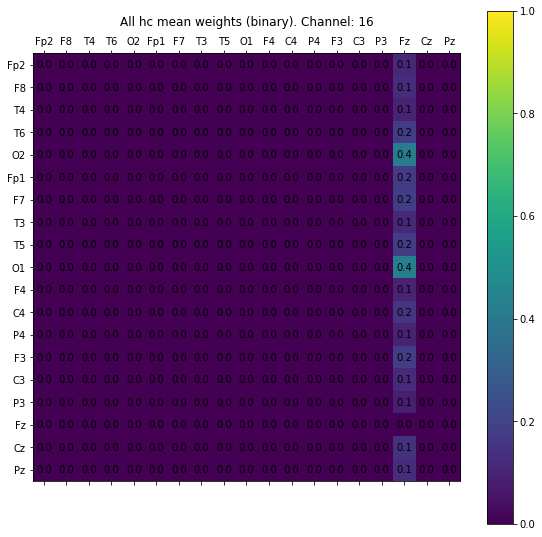

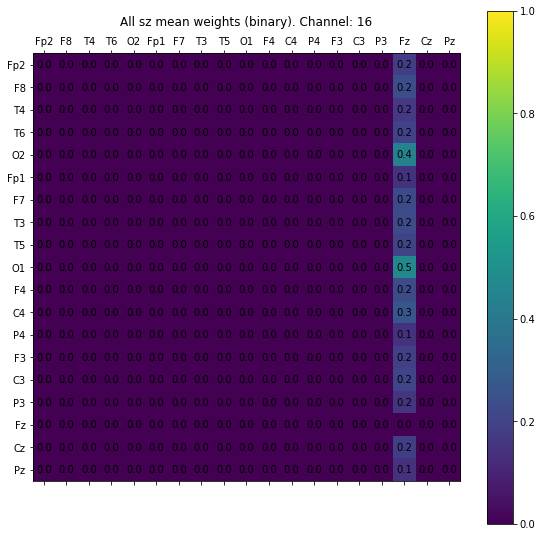

Channel: 17


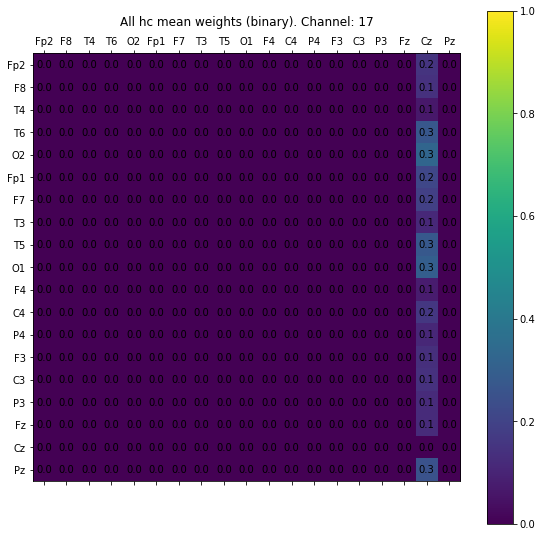

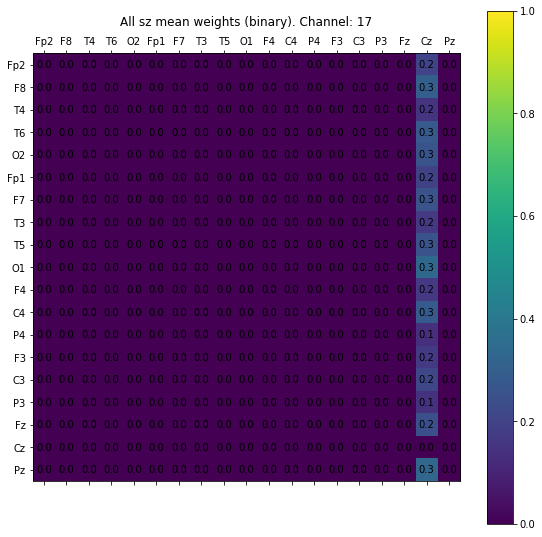

Channel: 18


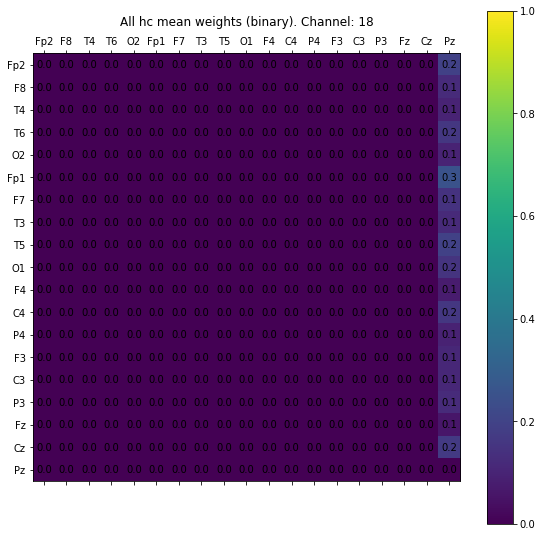

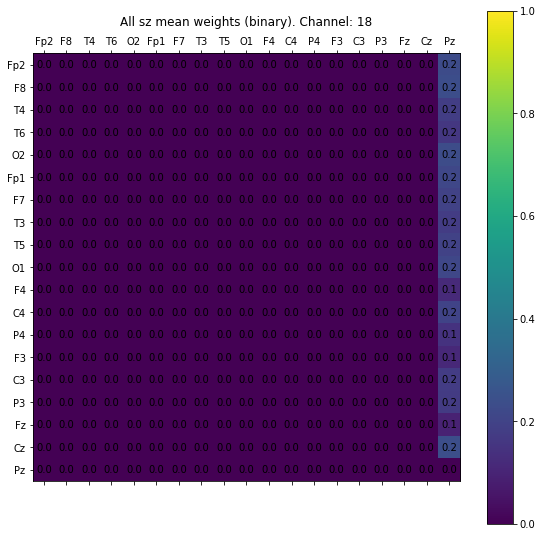

In [158]:
channels = [16, 17, 18]
for ch  in channels:
    print("Channel:", ch)
    _ = final_matrix(res_ch, sub_filenames=hc_filenames, channel=ch, plot_mean=True, plot_std=False)
    _ = final_matrix(res_ch, sub_filenames=sz_filenames, channel=ch, plot_mean=True, plot_std=False)
    plt.show()

In [112]:
from utils.read_data import read_data

/home/jarajaras/anaconda3/envs/eeg-env/lib/python3.7/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


Extracting EDF parameters from /home/jarajaras/dynamicinfo-eeg/data/h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...


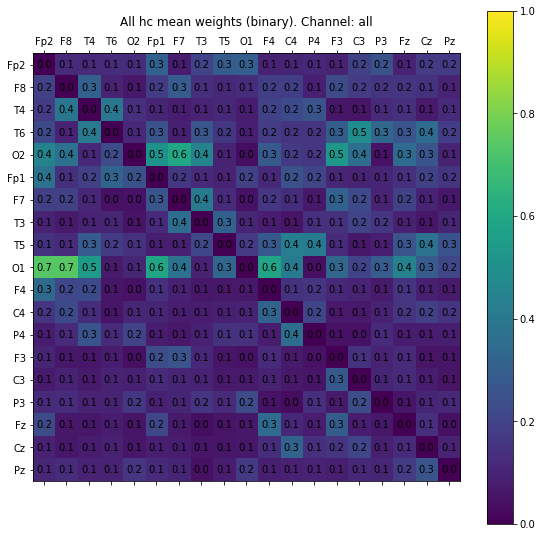

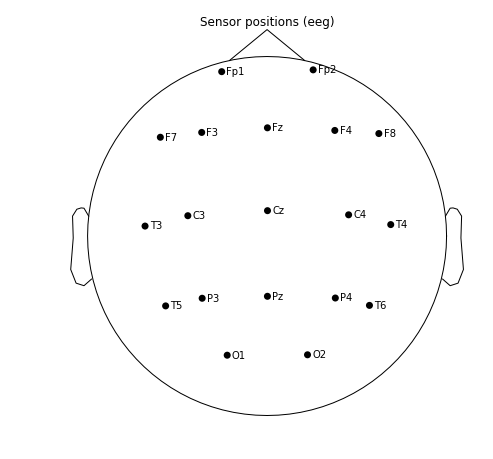

In [159]:
mat_hc, _ = final_matrix(res_ch, all_filenames_hc, channel = "all", plot_mean = True, plot_std = False)

raw = read_data('../data/h01.edf')
raw.plot_sensors(show_names=True)
plt.show()

/home/jarajaras/anaconda3/envs/eeg-env/lib/python3.7/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


Extracting EDF parameters from /home/jarajaras/dynamicinfo-eeg/data/h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...


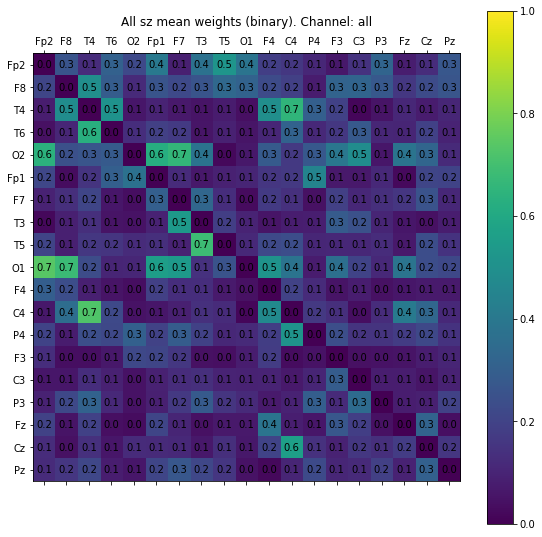

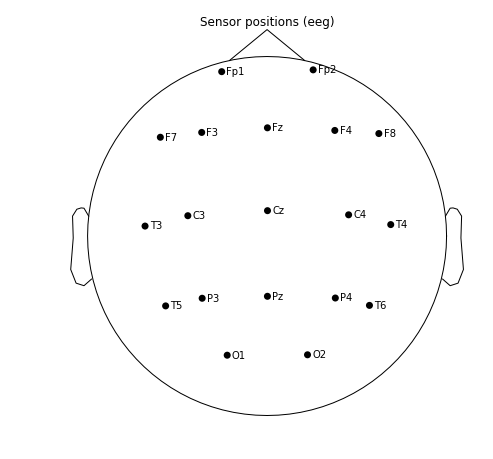

In [160]:
mat_sz, _ = final_matrix(res_ch, all_filenames_sz, channel="all", plot_mean = True, plot_std = False)

raw = read_data('../data/h01.edf')
raw.plot_sensors(show_names=True)
plt.show()

/home/jarajaras/anaconda3/envs/eeg-env/lib/python3.7/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


8
17


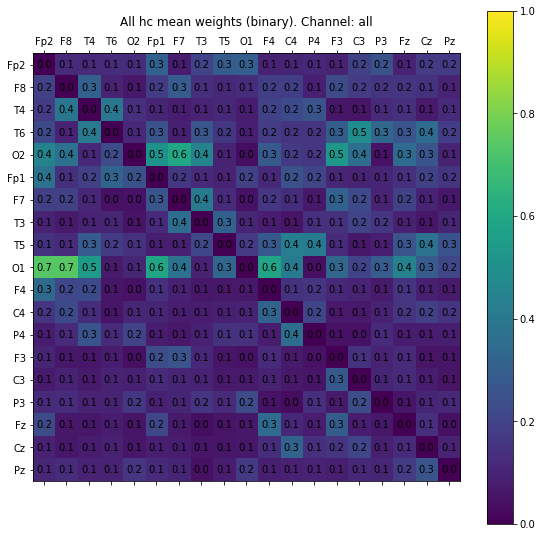

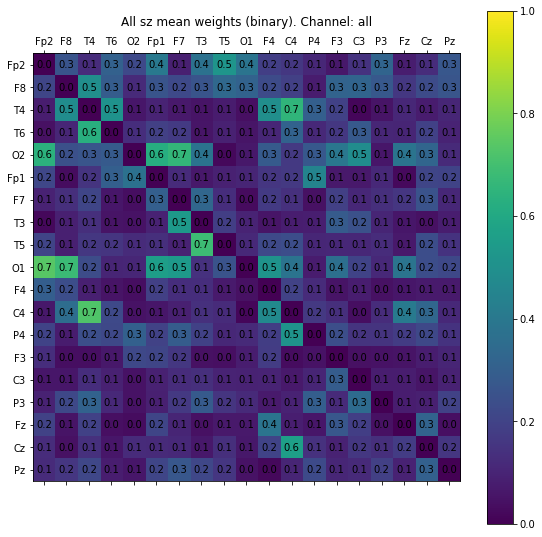

In [205]:
alpha = 0.5
mat_hc, _ = final_matrix(res_ch, all_filenames_hc, channel = "all", plot_mean = True, plot_std = False)
mat_sz, _ = final_matrix(res_ch, all_filenames_sz, channel="all", plot_mean = True, plot_std = False)
print(np.sum(mat_hc > alpha))
print(np.sum(mat_sz > alpha))

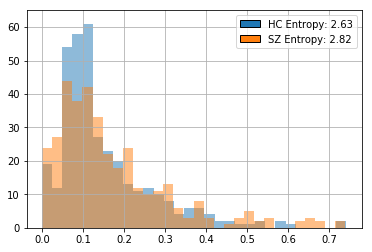

In [190]:
from matplotlib.patches import Rectangle

bins = 30
p_hc, p_supp, _ = plt.hist(mat_hc.flatten(), bins=bins, alpha=0.5)
p_sz, p_supp, _ = plt.hist(mat_sz.flatten(), bins=bins, alpha=0.5)

handles = [Rectangle((0,0),1,1,color=c, ec="k") for c in ["C0", "C1"]]
H_hc = -np.sum(p_hc/sum(p_hc) * np.log(p_hc/sum(p_hc) + 1e-6))
H_sz = -np.sum(p_sz/sum(p_sz) * np.log(p_sz/sum(p_sz) + 1e-6))
labels = [f"HC Entropy: {H_hc:.2f}", f"SZ Entropy: {H_sz:.2f}"]
plt.legend(handles, labels)

plt.ylim(0, 65)
plt.grid()

2.8176972303725374


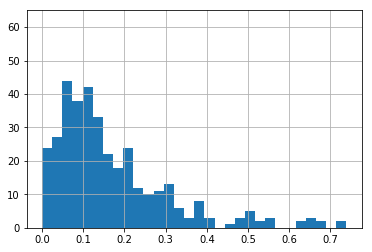

In [191]:
p, p_supp, _ = plt.hist(mat_sz.flatten(), bins=30)
plt.ylim(0, 65)
plt.grid()
p = p/sum(p)
print(-np.sum(p * np.log(p + 1e-6)))

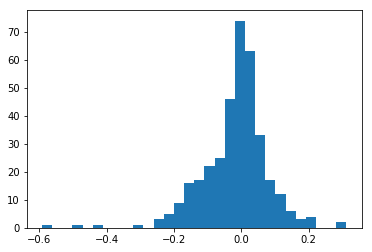

In [169]:
p, p_supp, _ = plt.hist(mat_hc.flatten() - mat_sz.flatten(), bins=30)

In [ ]:
# HZ all channels
#channels = [16, 17, 18]
#sub = 'sz'
#for ch  in channels:
#    _ = final_matrix(sub = sub, channel = ch, plot_mean = True, plot_std = False)

In [ ]:
# try just one subject
#w = 'binary'
#mm, ms, e= matrix_weights_stats(res_ch['h01']['16'], w, True, True)
#print(mm.shape)

In [ ]:
#npy = np.load("te.npy", allow_pickle=True)
#npy[0].get_adjacency_matrix("max_te_lag", fdr=False).get_edge_list()

#net_analysis.get_adjacency_matrix("max_te_lag", fdr=False).get_edge_list()
#for n in npy:
#    plt.figure()
#    plt.matshow(n.get_adjacency_matrix("max_te_lag", fdr=False)._weight_matrix)
#net_analysis.get_adjacency_matrix("max_p_lag", fdr=False)._weight_matrix

#npz = np.load(f"{load_filepath}.npz", allow_pickle=True)
#npz["te"]

In [ ]:
#npy[0].get_adjacency_matrix("max_te_lag", fdr=False).get_edge_list()

In [ ]:
#matrices = np.array([net.get_adjacency_matrix("max_te_lag", fdr=False)._weight_matrix for net in npy])
#plt.matshow(matrices.mean(axis=0))
#plt.matshow(matrices.std(axis=0))
#matrices.std(axis=0)

In [ ]:
#results.print_edge_list(weights='max_te_lag', fdr=False)
#plot_network(results=results, weights='max_te_lag', fdr=False)

In [ ]:
#npy[0]._single_target[16]["te"]